# Project Observed Winds in the Boundary Layer



## Question I: how does the surface wind vary? In time?


In [15]:
import numpy as np
from datetime import datetime
from datetime import timedelta
import matplotlib 
import matplotlib.pyplot as plt
from module_sirtaobs import *
import seaborn as sns
from sklearn import datasets, linear_model

In [16]:
def read_anemo_oneyear(mon='01',z=20):
    if isinstance(mon,int):
       yr=str(mon)
    rdir = './A_Wind_in_boundary_layer/lidar_monthly/wlscerea_1a_windLz1M10mn-LR_v02_2017'
    tt, utmp, vtmp = readanemofile(rdir + str(mon) +'.nc')
    u_mean = np.nanmean(utmp, axis=1)
    v_mean = np.nanmean(vtmp, axis=1)
    spd_mean = np.sqrt(u_mean**2 + v_mean**2)
    val = np.transpose(np.asarray([u_mean,v_mean,spd_mean]))

    tt = tt[:, 0] if tt.ndim > 1 else tt
    
    anemo = pd.DataFrame(val,index=tt,columns = ['u','v','speed'])
    return anemo

In [18]:
mon='03'
z=70
aw = read_anemo_oneyear(mon,z)

print(aw)

                             u         v      speed
2017-02-28 23:50:00  11.650326  4.694537  12.560604
2017-03-01 00:00:00  10.624824  5.012084  11.747675
2017-03-01 00:10:00   9.574990  4.615684  10.629438
2017-03-01 00:20:00  10.135968  4.464498  11.075631
2017-03-01 00:30:00   9.888374  4.846142  11.012041
...                        ...       ...        ...
2017-03-31 23:00:00   3.864471  5.868456   7.026586
2017-03-31 23:10:00   3.419378  5.338154   6.339404
2017-03-31 23:20:00   3.303426  5.317816   6.260335
2017-03-31 23:30:00   4.052072  5.342119   6.705037
2017-03-31 23:40:00   4.805509  5.183206   7.068135

[4464 rows x 3 columns]


C:\Users\Administrator\AppData\Local\Temp\ipykernel_19052\3331425561.py:6: RuntimeWarning: Mean of empty slice
  u_mean = np.nanmean(utmp, axis=1)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19052\3331425561.py:7: RuntimeWarning: Mean of empty slice
  v_mean = np.nanmean(vtmp, axis=1)


In [7]:
utmpdf = aw[datetime(yr,4,1):datetime(yr,5,1)]['u']
print(utmpdf)
utmp   = utmpdf.values
print(utmp)

TypeError: 'str' object cannot be interpreted as an integer

In [9]:
print("Averaging with data \n")
awmonthly = aw.resample('D').mean()
print(awmonthly)

Averaging with data 

                    u         v      speed
2016-12-31   1.760471  3.618425   4.023961
2017-01-01   1.722458  4.831683   5.180019
2017-01-02  -0.076053 -1.117204   3.834161
2017-01-03   2.018662  0.975581   3.136973
2017-01-04   6.008367 -2.643898   8.046876
2017-01-05  -0.543135 -5.889481   6.631987
2017-01-06  -3.142146  1.373956   3.552903
2017-01-07   3.358207  2.206943   5.127611
2017-01-08   1.497517 -1.828930   3.315194
2017-01-09   4.736542  4.178462   6.457411
2017-01-10   5.371439 -3.297315   6.485176
2017-01-11   8.565426  0.450905   9.515104
2017-01-12   8.656830  4.705771  11.463899
2017-01-13  10.426567 -2.434963  11.213511
2017-01-14   5.880688 -4.668059   7.964849
2017-01-15   2.160675 -0.621809   5.209016
2017-01-16  -2.910077 -2.849745   4.204996
2017-01-17  -4.143233 -4.988976   6.623354
2017-01-18  -6.224144 -5.930782   8.628370
2017-01-19  -6.415082 -3.750161   7.506913
2017-01-20  -6.189817 -0.911203   6.345972
2017-01-21  -3.423134  1.582258 

In [10]:
plt.figure(1)
aw['speed'][datetime(int(yr),1,1):datetime(int(yr),12,31)].plot()
plt.axis([datetime(yr,7,1),datetime(yr,7,31),0, 8.])
plt.show()

KeyError: Timestamp('1-01-01 00:00:00')

<Figure size 640x480 with 0 Axes>

In [9]:
aw['hour'] = [ts.hour for ts in aw.index]

NameError: name 'aw' is not defined

In [10]:
awhourly = aw.groupby('hour').mean()

NameError: name 'aw' is not defined

In [11]:
plt.figure(3)                                          #  opens a figure
awhourly['speed'][:].plot(color='DarkOrange',linewidth=3,label="Diurnal cycle for year " + str(yr))
plt.grid()                                             #  adds gridlines
plt.axis([0, 24, 0., awhourly['speed'].max()*1.2])     #  Adjusts the axes so that we see the relative importance of the diurnal cycle
plt.legend(loc="lower right")                                           # adds the legend
plt.show()

NameError: name 'awhourly' is not defined

<Figure size 432x288 with 0 Axes>

In [34]:
print(aw[:][datetime(yr,4,1):datetime(yr,4,30)])

                        u     v     speed  hour
2012-04-01 00:00:00 -3.95 -3.56  5.317528     0
2012-04-01 00:05:00 -3.65 -3.29  4.913919     0
2012-04-01 00:10:00 -3.62 -3.26  4.871550     0
2012-04-01 00:15:00 -3.95 -4.05  5.657296     0
2012-04-01 00:20:00 -3.85 -3.78  5.395452     0
...                   ...   ...       ...   ...
2012-04-29 23:40:00 -0.62  2.87  2.936205    23
2012-04-29 23:45:00  0.07  2.32  2.321056    23
2012-04-29 23:50:00  0.39  1.52  1.569235    23
2012-04-29 23:55:00  0.77  1.86  2.013082    23
2012-04-30 00:00:00 -0.01  1.79  1.790028     0

[8353 rows x 4 columns]


<Figure size 432x288 with 0 Axes>

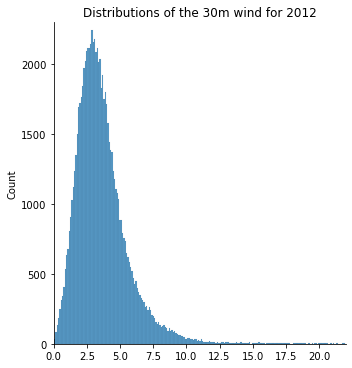

In [38]:
plt.figure(2)
sns.displot(aw['speed'].values)
plt.title('Distributions of the ' + str(z) +'m wind for ' + str(yr))
plt.axis([0,22,0, 2300])             
plt.show()

2005
2006
2007
2008
2009
2010
2011
2012
2013
2014


<Figure size 432x288 with 0 Axes>

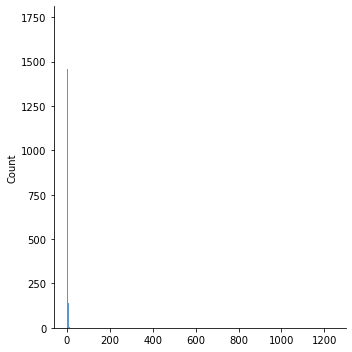

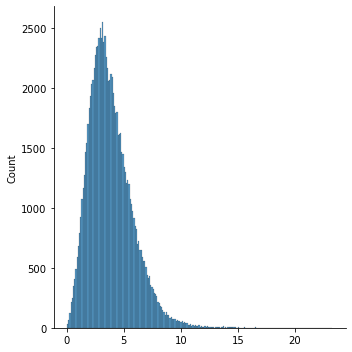

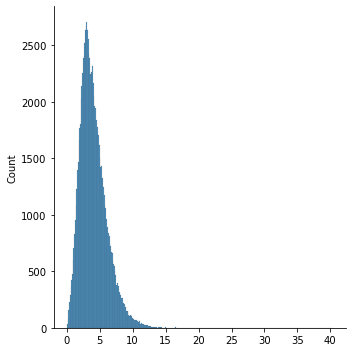

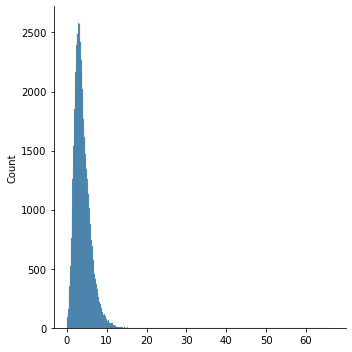

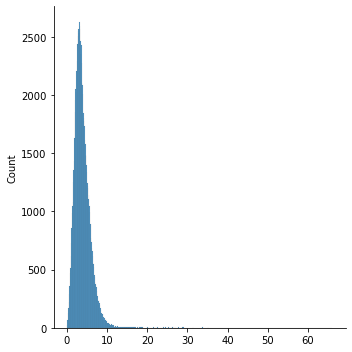

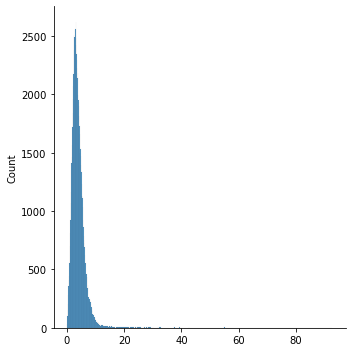

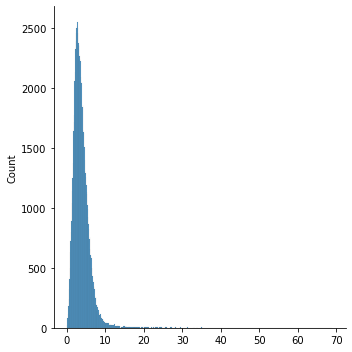

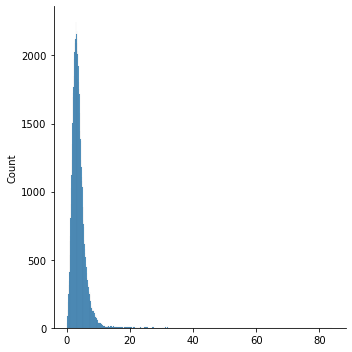

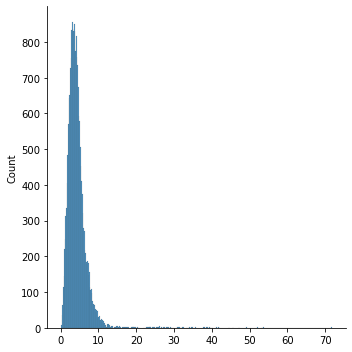

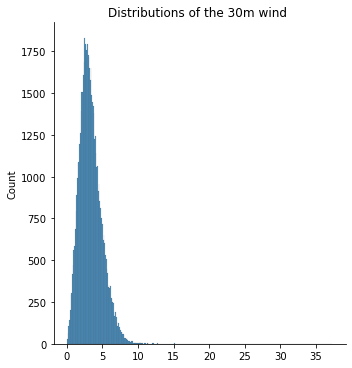

In [16]:
## This is a first hint, or invitation, to go through the different years and to compare the distributions and their variability. 
## Work is needed to really do the analysis of this variability, to imagine figures that would allow and illustrate this analysis
plt.figure(3)
z=30
for yr in range(2005,2015):
    aw = read_anemo_oneyear(yr,z)
    sns.displot(aw['speed'].values)
    print(yr)
plt.title('Distributions of the ' + str(z) + 'm wind ')
plt.show()

## Part II: vertical wind profiles measured by a lidar

Another sample of measurements from SIRTA that is available consists in lidar observations that describe the vertical profiles of wind. A bit more than a year is made available. This provides an opportunity to look at instantaneous vertical profiles of wind, but also to investigate time-averaged vertical profiles (over one or several hours) and to explore how relevant the commonly used approximations are. 

### Vertical variation of wind

For wind resource assessment, actors of the wind sector typically set up a mast equipped with anemometers at several heights. The measurements are used to estimate a vertical profile of the wind, typically using a power law. This is then used to extrapolate the wind to the height considered for the hub of wind farms, typically around 100m nowadays. 

In [39]:
rdoppdir = "./data/"
fname = rdoppdir + "Doppler-lidar_Wind-profile_SIRTA_2014-2015.txt"
f = open(fname)
b = f.readlines()    
f.close()

In [40]:
print("The file read contains measurements from \n" + "     "  + str(timelidar(b[0])))
print("  to " + str(timelidar(b[-1])))

The file read contains measurements from 
     2014-08-01 00:00:00
  to 2015-09-30 23:50:00


2015-03-01 00:00:00


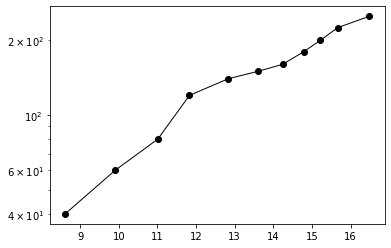

In [52]:
yr = 2015
mo = 3
da = 1
ho = 20
mi = 0
uu, zlidar = plotlidarprofile(b,datetime(yr,mo,da),'black',2,logornot=1)        

### Wind Profile Study
The following are preliminary instructions to begin investigating the vertical profile of the wind, and the accuracy of its description with different models. Below we suggest the procedure to obtain an approximation of the vertical profile (power law, or logarithmic profile?). You are invited to explore this for other times and/or for time-averaged vertical profiles on different timescales. 

In [69]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [70]:
# Train the model using the training sets
zlidar = zlidar.reshape(-1,1)
regr.fit(np.log(zlidar), uu)

LinearRegression()

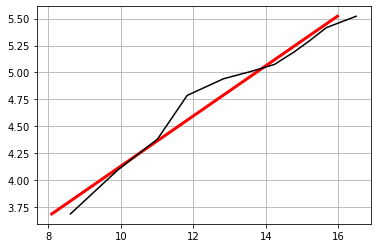

In [71]:
# Check with a plot using log of z as vertical coordinate
plt.plot(regr.predict(np.log(zlidar)), np.log(zlidar), color='red',linewidth=3)
plt.plot(uu, np.log(zlidar), color='black')
plt.grid()

Text(0, 0.5, 'Altitude')

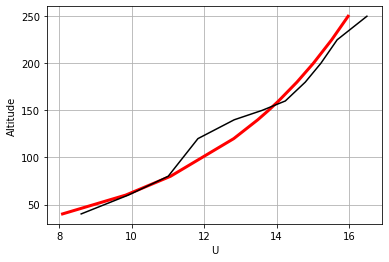

In [72]:
# Now with a plot using z as vertical coordinate
plt.plot(regr.predict(np.log(zlidar)), zlidar, color='red',linewidth=3)
plt.plot(uu, zlidar, color='black')
plt.grid(); plt.xlabel('U'); plt.ylabel('Altitude')

In [ ]:
plt.plot()